<a href="https://colab.research.google.com/github/srujana-koripalli/Team_Jarvis_DM_Final_Project/blob/main/DM_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM FINAL PROJECT

**Topic:**

Predict Most profitable real estate investment in  San Jose city.

**Team Members:**

* Srujana Koripalli 
* Prajakta Joshi
* Mamatha Guntu
* Umashankar kumar


## Data Preparation

**Import libraries**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import io
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans 
from yellowbrick import ROCAUC
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install eli5
from eli5 import explain_weights
from eli5.sklearn import PermutationImportance
import eli5

In [ ]:
!pip install requests
!pip install html5lib
!pip install bs4

In [ ]:
import requests 
from bs4 import BeautifulSoup 


In [ ]:
# load data
import pandas as pd 

house_data = pd.read_csv('/content/gdrive/Shareddrives/DM_Datasets/zillow_data_scraped.csv')
house_data

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,Street Address,City,Zip,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/238-Kenbroo...,625700.0,655000,2849.0,Not specified,2.0,3.0,1164.0,NaN,CONDO,238 Kenbrook Cir,San Jose,95111,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
1,https://www.zillow.com/homedetails/473-Toyon-A...,920100.0,920000,3499.0,Not specified,2.0,3.0,1287.0,NaN,SINGLE_FAMILY,473 Toyon Ave,San Jose,95127,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
2,https://www.zillow.com/homedetails/6424-Nepo-C...,1451600.0,1420000,3959.0,Not specified,2.0,4.0,1958.0,NaN,SINGLE_FAMILY,6424 Nepo Ct,San Jose,95119,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
3,https://www.zillow.com/homedetails/5887-Paddon...,1379100.0,1379000,3697.0,Not specified,2.0,3.0,1675.0,NaN,SINGLE_FAMILY,5887 Paddon Cir,San Jose,95123,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
4,https://www.zillow.com/homedetails/443-Mignot-...,896800.0,900000,3820.0,Not specified,3.0,5.0,1617.0,NaN,SINGLE_FAMILY,443 Mignot Ln,San Jose,95111,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,https://www.zillow.com/homedetails/38-N-Almade...,713300.0,699000,2749.0,46,1.0,1.0,953.0,NaN,CONDO,38 N Almaden Blvd UNIT 516,San Jose,95110,CA,USA,NaN,False,True,False,False,For Sale (Broker),Condo for sale,FOR_SALE
395,https://www.zillow.com/homedetails/466-N-13th-...,NaN,2250000,2100.0,46,NaN,NaN,3825.0,NaN,MULTI_FAMILY,466 N 13th St,San Jose,95112,CA,USA,NaN,False,True,False,False,For Sale (Broker),Multi-family home for sale,FOR_SALE
396,https://www.zillow.com/homedetails/530-N-2nd-S...,2414030.0,2395000,1694.0,46,NaN,NaN,4088.0,NaN,MULTI_FAMILY,530 N 2nd St,San Jose,95112,CA,USA,NaN,False,True,False,False,For Sale (Broker),Multi-family home for sale,FOR_SALE
397,https://www.zillow.com/homedetails/188-W-Saint...,512800.0,509000,2777.0,48,1.0,0.0,519.0,NaN,CONDO,188 W Saint James St #10317,San Jose,95110,CA,USA,NaN,False,True,False,False,For Sale (Broker),Condo for sale,FOR_SALE


In [ ]:
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Url             399 non-null    object 
 1   Zestimate       301 non-null    float64
 2   Price           399 non-null    int64  
 3   Rent Zestimate  383 non-null    float64
 4   Days On Zillow  399 non-null    object 
 5   Bathrooms       373 non-null    float64
 6   Bedrooms        372 non-null    float64
 7   Living Area     386 non-null    float64
 8   Lot Size        0 non-null      float64
 9   Home Type       399 non-null    object 
 10  Street Address  399 non-null    object 
 11  City            399 non-null    object 
 12  Zip             399 non-null    int64  
 13  State           399 non-null    object 
 14  Country         399 non-null    object 
 15  Broker Name     6 non-null      object 
 16  Has 3D Model    399 non-null    bool   
 17  Has Image       373 non-null    obj

In [ ]:
# remove houses with price 0 or Nan 
house_data = house_data[house_data['Price']>0]
house_data.head(10)

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,Street Address,City,Zip,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/238-Kenbroo...,625700.0,655000,2849.0,Not specified,2.0,3.0,1164.0,NaN,CONDO,238 Kenbrook Cir,San Jose,95111,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
1,https://www.zillow.com/homedetails/473-Toyon-A...,920100.0,920000,3499.0,Not specified,2.0,3.0,1287.0,NaN,SINGLE_FAMILY,473 Toyon Ave,San Jose,95127,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
2,https://www.zillow.com/homedetails/6424-Nepo-C...,1451600.0,1420000,3959.0,Not specified,2.0,4.0,1958.0,NaN,SINGLE_FAMILY,6424 Nepo Ct,San Jose,95119,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
3,https://www.zillow.com/homedetails/5887-Paddon...,1379100.0,1379000,3697.0,Not specified,2.0,3.0,1675.0,NaN,SINGLE_FAMILY,5887 Paddon Cir,San Jose,95123,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
4,https://www.zillow.com/homedetails/443-Mignot-...,896800.0,900000,3820.0,Not specified,3.0,5.0,1617.0,NaN,SINGLE_FAMILY,443 Mignot Ln,San Jose,95111,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
5,https://www.zillow.com/homedetails/307-Tradewi...,552000.0,552000,2385.0,Not specified,2.0,2.0,992.0,NaN,CONDO,307 Tradewinds Dr APT 9,San Jose,95123,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
6,https://www.zillow.com/homedetails/461-N-15th-...,1108000.0,1150000,3200.0,Not specified,2.0,2.0,1428.0,NaN,SINGLE_FAMILY,461 N 15th St,San Jose,95112,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
7,https://www.zillow.com/homedetails/470-Nolden-...,2144400.0,2030000,4857.0,Not specified,4.0,5.0,2204.0,NaN,SINGLE_FAMILY,470 Nolden Ave,San Jose,95117,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
8,https://www.zillow.com/homedetails/5604-Makati...,675100.0,675000,2840.0,Not specified,2.0,2.0,1233.0,NaN,CONDO,5604 Makati Cir,San Jose,95123,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD
9,https://www.zillow.com/homedetails/2573-Island...,1115500.0,1114000,3399.0,Not specified,3.0,3.0,1406.0,NaN,SINGLE_FAMILY,2573 Island Palm Ct,San Jose,95133,CA,USA,NaN,False,True,False,False,Unknown Listed By,Sold,SOLD


In [ ]:
house_data.statusType.unique()

array(['SOLD', 'FOR_RENT', 'FOR_SALE'], dtype=object)

In [ ]:
house_data.isnull().sum()

Url                 0
Zestimate          98
Price               0
Rent Zestimate     16
Days On Zillow      0
Bathrooms          26
Bedrooms           27
Living Area        13
Lot Size          399
Home Type           0
Street Address      0
City                0
Zip                 0
State               0
Country             0
Broker Name       393
Has 3D Model        0
Has Image          26
Has Video           0
isZillowOwned       0
sgapt               0
statusText          0
statusType          0
dtype: int64

In [ ]:
house_data["statusType"].unique()

array(['SOLD', 'FOR_RENT', 'FOR_SALE'], dtype=object)

In [ ]:
house_data = house_data.drop(['Broker Name','Lot Size', 'Url', 'Has 3D Model', 'Has Image', 'Has Video', 'sgapt', 'Lot Size', 'City', 'State', 'Country', 'isZillowOwned', 'statusText'],axis=1)

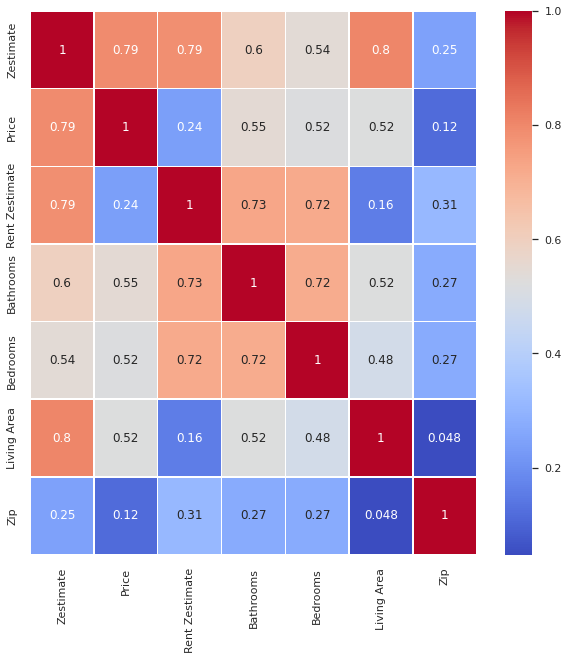

In [ ]:
corr=house_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=.5,  cmap='coolwarm')

In [ ]:
house_data_num = house_data.select_dtypes(include = ['float64', 'int64'])
house_data_num.head()

,Zestimate,Price,Rent Zestimate,Bathrooms,Bedrooms,Living Area,Zip
0,625700.0,655000,2849.0,2.0,3.0,1164.0,95111
1,920100.0,920000,3499.0,2.0,3.0,1287.0,95127
2,1451600.0,1420000,3959.0,2.0,4.0,1958.0,95119
3,1379100.0,1379000,3697.0,2.0,3.0,1675.0,95123
4,896800.0,900000,3820.0,3.0,5.0,1617.0,95111


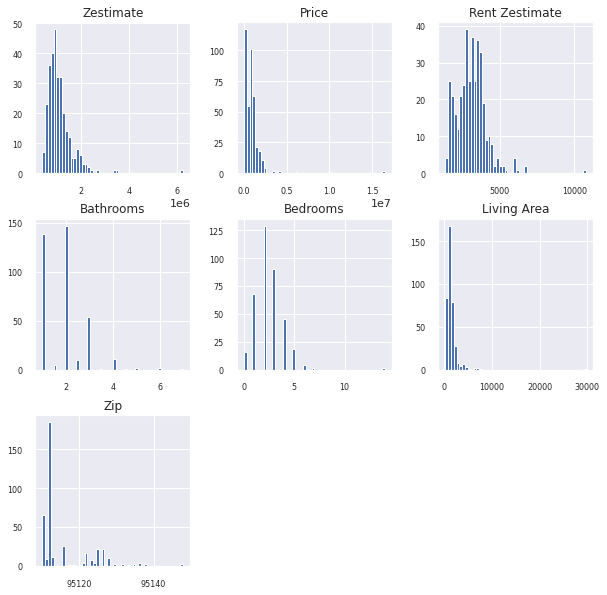

In [ ]:
house_data_num.hist(figsize=(10,10), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
#mortgage and HOA calculation
downpayment = house_data.Zestimate * 0.2
loanAmount = house_data.Zestimate-downpayment
interest = loanAmount *.03
loanAmount = loanAmount+interest
mortgage_calculated = loanAmount/30 
house_data['Mortgage']=mortgage_calculated

hoa = np.random.randint(350, 550, size=house_data.shape[0])
house_data['HOA']=hoa
house_data.head()

,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Home Type,Street Address,Zip,statusType,Mortgage,HOA
0,625700.0,655000,2849.0,Not specified,2.0,3.0,1164.0,CONDO,238 Kenbrook Cir,95111,SOLD,17185.893333,395
1,920100.0,920000,3499.0,Not specified,2.0,3.0,1287.0,SINGLE_FAMILY,473 Toyon Ave,95127,SOLD,25272.080000,500
2,1451600.0,1420000,3959.0,Not specified,2.0,4.0,1958.0,SINGLE_FAMILY,6424 Nepo Ct,95119,SOLD,39870.613333,431
3,1379100.0,1379000,3697.0,Not specified,2.0,3.0,1675.0,SINGLE_FAMILY,5887 Paddon Cir,95123,SOLD,37879.280000,491
4,896800.0,900000,3820.0,Not specified,3.0,5.0,1617.0,SINGLE_FAMILY,443 Mignot Ln,95111,SOLD,24632.106667,540


## Scrape crime index data

In [ ]:

Zip_code =[]
Violent_Crime =[]
Property_Crime =[]
def getCrimeIndex(zipcode):
  url = "https://www.bestplaces.net/crime/zip-code/california/san_jose/"
  s=[]
  for i in range(0,len(zipcode)):
    s.append(url+str(zipcode[i]))

  for i in range(0,len(s)):
    r = requests.get(s[i],verify=False)  
    soup = BeautifulSoup(r.content, 'html5lib')
    c = soup.find(text='Crime is ranked on a scale of 1 (low crime) to 100 (high crime)')
    Zip_code.append(zipcode[i])
    if (c is None):
      Violent_Crime.append("0")
      Property_Crime.append("0")
    if not (c is None):
      d = c.find_next("h5").text
      d = d.split(". ")[0]
      Violent_Crime.append(d[-4:-2])
      e = c.find_next("h5").find_next("h5").text
      e = e.split(". ")[0]
      Property_Crime.append(e[-4:-2])



In [ ]:
getCrimeIndex(house_data['Zip'])

In [ ]:
crime_index_df = pd.DataFrame()
crime_index_df['Zip_code'] = Zip_code
crime_index_df['Violent_crime'] = Violent_Crime
crime_index_df['Property_Crime'] = Property_Crime

house_data = pd.concat([house_data, crime_index_df], axis=1, join="inner")
house_data.head()

,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Home Type,Street Address,Zip,statusType,Mortgage,HOA,Zip_code,Violent_crime,Property_Crime
0,625700.0,655000,2849.0,Not specified,2.0,3.0,1164.0,CONDO,238 Kenbrook Cir,95111,SOLD,17185.893333,518,95111,33,44
1,920100.0,920000,3499.0,Not specified,2.0,3.0,1287.0,SINGLE_FAMILY,473 Toyon Ave,95127,SOLD,25272.080000,503,95127,26,38
2,1451600.0,1420000,3959.0,Not specified,2.0,4.0,1958.0,SINGLE_FAMILY,6424 Nepo Ct,95119,SOLD,39870.613333,360,95119,20,29
3,1379100.0,1379000,3697.0,Not specified,2.0,3.0,1675.0,SINGLE_FAMILY,5887 Paddon Cir,95123,SOLD,37879.280000,535,95123,22,32
4,896800.0,900000,3820.0,Not specified,3.0,5.0,1617.0,SINGLE_FAMILY,443 Mignot Ln,95111,SOLD,24632.106667,375,95112,43,54


In [ ]:
house_data.to_csv('/content/gdrive/Shareddrives/DM_Datasets/house_data_with_crime_index.csv')

In [ ]:
house_data = pd.read_csv('/content/gdrive/Shareddrives/DM_Datasets/house_data_with_crime_index.csv')
house_data

,Unnamed: 0,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Home Type,Street Address,Zip,statusType,Mortgage,HOA
0,0,625700.0,655000,2849.0,Not specified,2.0,3.0,1164.0,CONDO,238 Kenbrook Cir,95111,SOLD,17185.893333,365
1,1,920100.0,920000,3499.0,Not specified,2.0,3.0,1287.0,SINGLE_FAMILY,473 Toyon Ave,95127,SOLD,25272.080000,446
2,2,1451600.0,1420000,3959.0,Not specified,2.0,4.0,1958.0,SINGLE_FAMILY,6424 Nepo Ct,95119,SOLD,39870.613333,486
3,3,1379100.0,1379000,3697.0,Not specified,2.0,3.0,1675.0,SINGLE_FAMILY,5887 Paddon Cir,95123,SOLD,37879.280000,380
4,4,896800.0,900000,3820.0,Not specified,3.0,5.0,1617.0,SINGLE_FAMILY,443 Mignot Ln,95111,SOLD,24632.106667,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,713300.0,699000,2749.0,46,1.0,1.0,953.0,CONDO,38 N Almaden Blvd UNIT 516,95110,FOR_SALE,19591.973333,472
395,395,NaN,2250000,2100.0,46,NaN,NaN,3825.0,MULTI_FAMILY,466 N 13th St,95112,FOR_SALE,NaN,447
396,396,2414030.0,2395000,1694.0,46,NaN,NaN,4088.0,MULTI_FAMILY,530 N 2nd St,95112,FOR_SALE,66305.357333,402
397,397,512800.0,509000,2777.0,48,1.0,0.0,519.0,CONDO,188 W Saint James St #10317,95110,FOR_SALE,14084.906667,547


## scrape school data 

In [ ]:
quality=[]
commute_time=[]
free_lunch=[]
total_schools=[]
def getSchoolData(zipcodes):
  url = "https://www.zipdatamaps.com/"
  s=[]
  for i in range(0,len(zipcodes)):
    s.append(url+str(zipcodes[i]))

 

  for i in range(0,len(s)):
    r = requests.get(s[i])  
    soup = BeautifulSoup(r.content, 'html5lib')
    c = soup.find(text='School Test Performance:')
    d = soup.find(text='Average Commute Time')
    e = soup.find(text='Percentage of Students Eligible For')  
    f = soup.find(text='Percentage of Public Schools with')
    # x.append(zipcodes[i])
    if (c is None):
      quality.append("0")
      commute_time.append("0")
      free_lunch.append("0")
      total_schools.append("0")
    if not (c is None):
      quality.append(c.find_next("td").text)
      commute_time.append(d.find_next("td").text.replace("Minutes", ""))
      free_lunch.append(e.find_next("td").text.replace("%", ""))
      total_schools.append(f.find_next("td").text.replace("%", ""))

In [ ]:
getSchoolData(house_data['Zip'])

In [ ]:
school_data_df = pd.DataFrame()
school_data_df['quality'] = quality
school_data_df['commute_time'] = commute_time
school_data_df['free_lunch'] = free_lunch
school_data_df['total_schools'] = total_schools

house_data = pd.concat([house_data, school_data_df], axis=1, join="inner")
house_data.head()


In [ ]:
house_data.to_csv('/content/gdrive/Shareddrives/DM_Datasets/house_data_with_school_data.csv')

In [ ]:
house_data  = pd.read_csv('/content/gdrive/Shareddrives/DM_Datasets/house_data_with_school_data.csv')

In [ ]:
house_data.update(house_data['free_lunch'].fillna(value=house_data['free_lunch'].mean(), inplace=True))
house_data.head(5)

,Unnamed: 0,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Home Type,Street Address,Zip,statusType,Mortgage,HOA,Zip_code,Violent_crime,Property_Crime,quality,commute_time,free_lunch,total_schools
0,0,625700.0,655000,2849.0,Not specified,2.0,3.0,1164.0,CONDO,238 Kenbrook Cir,95111,SOLD,17185.893333,518,95111,33,44,Average,27.1,74.6,100.0
1,1,920100.0,920000,3499.0,Not specified,2.0,3.0,1287.0,SINGLE_FAMILY,473 Toyon Ave,95127,SOLD,25272.080000,503,95127,26,38,Below Average,26.1,66.1,93.8
2,2,1451600.0,1420000,3959.0,Not specified,2.0,4.0,1958.0,SINGLE_FAMILY,6424 Nepo Ct,95119,SOLD,39870.613333,360,95119,20,29,Average,27.1,34.0,33.3
3,3,1379100.0,1379000,3697.0,Not specified,2.0,3.0,1675.0,SINGLE_FAMILY,5887 Paddon Cir,95123,SOLD,37879.280000,535,95123,22,32,Average,27.6,37.1,41.7
4,4,896800.0,900000,3820.0,Not specified,3.0,5.0,1617.0,SINGLE_FAMILY,443 Mignot Ln,95111,SOLD,24632.106667,375,95112,43,54,Average,27.1,74.6,100.0


In [ ]:
house_data.update(house_data['total_schools'].fillna(value=house_data['total_schools'].mean(), inplace=True))

In [ ]:
house_data.to_csv('/content/gdrive/Shareddrives/DM_Datasets/final_house_data.csv')

## Final Housing Data

In [ ]:
import pandas as pd

house_data = pd.read_csv('/content/gdrive/Shareddrives/DM_Datasets/final_house_data.csv')

In [ ]:
final_house_data = house_data.copy()
final_house_data.head(3)

,Unnamed: 0,Unnamed: 0.1,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Home Type,Street Address,Zip,statusType,Mortgage,HOA,Zip_code,Violent_crime,Property_Crime,quality,commute_time,free_lunch,total_schools
0,0,0,625700.0,655000,2849.0,Not specified,2.0,3.0,1164.0,CONDO,238 Kenbrook Cir,95111,SOLD,17185.893333,518,95111,33,44,Average,27.1,74.6,100.0
1,1,1,920100.0,920000,3499.0,Not specified,2.0,3.0,1287.0,SINGLE_FAMILY,473 Toyon Ave,95127,SOLD,25272.080000,503,95127,26,38,Below Average,26.1,66.1,93.8
2,2,2,1451600.0,1420000,3959.0,Not specified,2.0,4.0,1958.0,SINGLE_FAMILY,6424 Nepo Ct,95119,SOLD,39870.613333,360,95119,20,29,Average,27.1,34.0,33.3


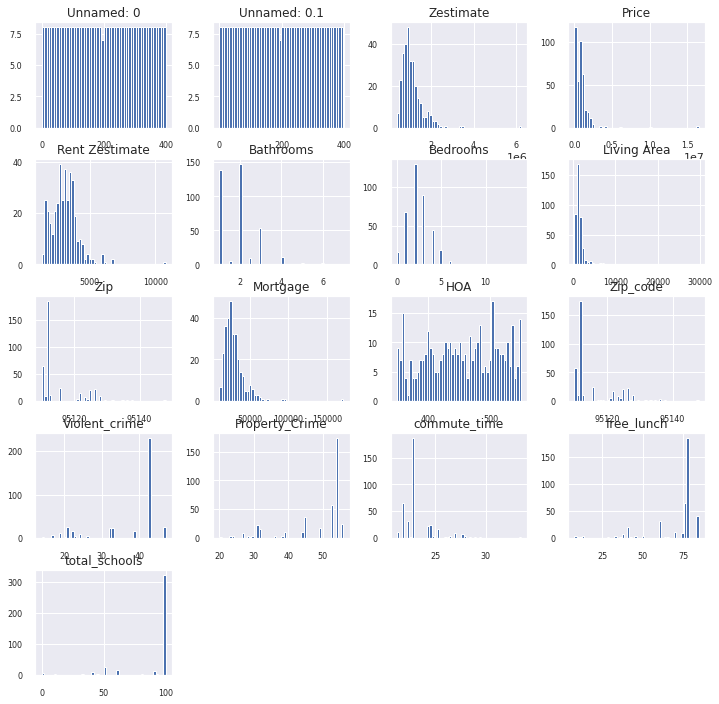

In [ ]:
final_house_data.hist(figsize=(12,12), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
house_data_corr = final_house_data.corr()['Price'][:-1] 
golden_features_list = house_data_corr[abs(house_data_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with ListPrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with ListPrice:
Price          1.000000
Mortgage       0.792220
Zestimate      0.792220
Bathrooms      0.548103
Living Area    0.520574
Bedrooms       0.518930
Name: Price, dtype: float64


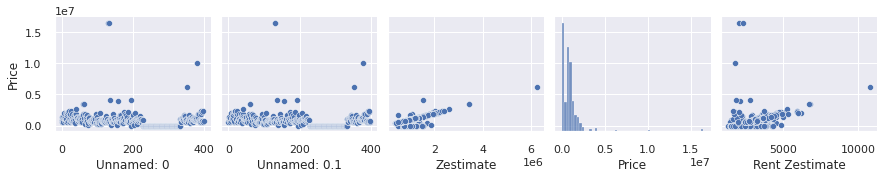

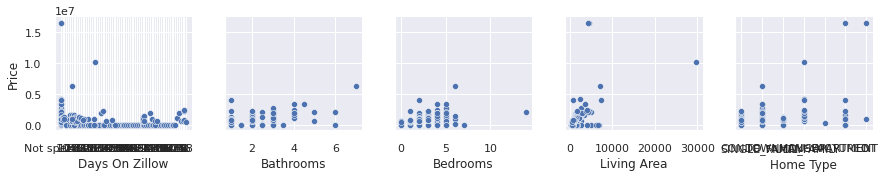

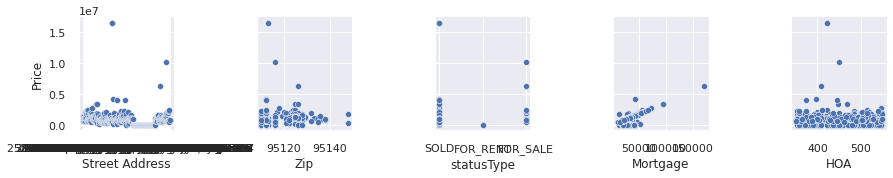

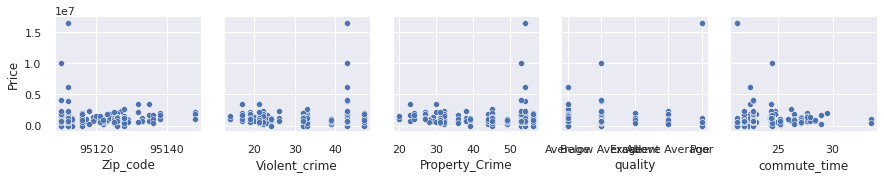

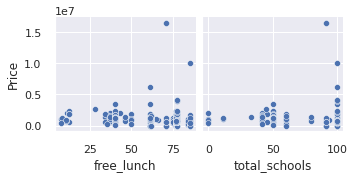

In [ ]:
for i in range(0, len(final_house_data.columns), 5):
    sns.pairplot(data=final_house_data,
                x_vars=final_house_data.columns[i:i+5],
                y_vars=['Price'])

In [ ]:
df_quantitative_values = final_house_data
df_quantitative_values.head()

,Unnamed: 0,Unnamed: 0.1,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Home Type,Street Address,Zip,statusType,Mortgage,HOA,Zip_code,Violent_crime,Property_Crime,quality,commute_time,free_lunch,total_schools
0,0,0,625700.0,655000,2849.0,Not specified,2.0,3.0,1164.0,CONDO,238 Kenbrook Cir,95111,SOLD,17185.893333,518,95111,33,44,Average,27.1,74.6,100.0
1,1,1,920100.0,920000,3499.0,Not specified,2.0,3.0,1287.0,SINGLE_FAMILY,473 Toyon Ave,95127,SOLD,25272.080000,503,95127,26,38,Below Average,26.1,66.1,93.8
2,2,2,1451600.0,1420000,3959.0,Not specified,2.0,4.0,1958.0,SINGLE_FAMILY,6424 Nepo Ct,95119,SOLD,39870.613333,360,95119,20,29,Average,27.1,34.0,33.3
3,3,3,1379100.0,1379000,3697.0,Not specified,2.0,3.0,1675.0,SINGLE_FAMILY,5887 Paddon Cir,95123,SOLD,37879.280000,535,95123,22,32,Average,27.6,37.1,41.7
4,4,4,896800.0,900000,3820.0,Not specified,3.0,5.0,1617.0,SINGLE_FAMILY,443 Mignot Ln,95111,SOLD,24632.106667,375,95112,43,54,Average,27.1,74.6,100.0


**PCA segmentation for low,mid and high buyer affinity:**

In [ ]:
# range=final_house_data['Price'].max()-final_house_data['Price'].min()
category=[]
slab1=(final_house_data['Price'].max()-final_house_data['Price'].min())/3+final_house_data['Price'].min()
slab2=(final_house_data['Price'].max()-final_house_data['Price'].min())*2/3+final_house_data['Price'].min()

final_house_data['Segment'] = 'Low'
final_house_data.loc[final_house_data['Price']>slab1,'Segment'] = 'Mid' 
final_house_data.loc[final_house_data['Price']>slab2,'Segment'] = 'High' 

In [ ]:
final_house_data.fillna(0.0,inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Rent Zestimate', 'Property_Crime', 'Violent_crime','commute_time','free_lunch','total_schools','Price']
# Separating out the features
x = final_house_data.loc[:, features].values
# Separating out the target
y = final_house_data.loc[:,['Segment']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Dimensionality Reduction - PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, final_house_data[['Segment']]], axis = 1)
finalDf

,principal component 1,principal component 2,Segment
0,0.895272,-0.538316,Low
1,1.829165,-0.918019,Low
2,5.143304,0.258154,Low
3,4.684493,0.320146,Low
4,0.167918,0.872593,Low
...,...,...,...
394,-1.280549,0.191428,Low
395,-1.113312,0.461035,Low
396,-1.185521,0.421582,Low
397,-1.243180,0.097567,Low


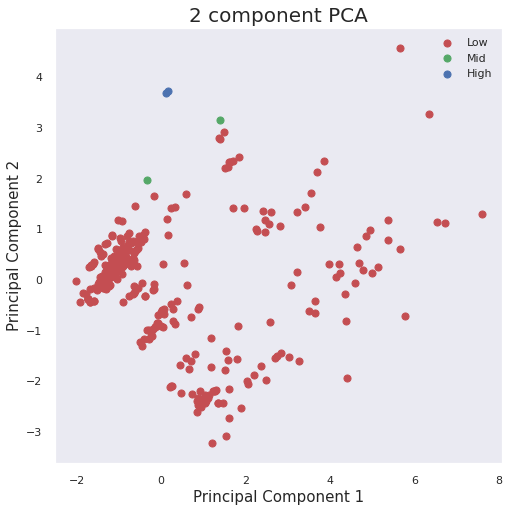

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Low', 'Mid', 'High']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Segment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
final_house_data['RentalIncome']=final_house_data['Rent Zestimate']-(final_house_data['Mortgage']+final_house_data['HOA'])

In [ ]:
final_house_data.info()
apply_kmeans = final_house_data.iloc[:, [1,22]].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      399 non-null    int64  
 1   Unnamed: 0.1    399 non-null    int64  
 2   Zestimate       399 non-null    float64
 3   Price           399 non-null    int64  
 4   Rent Zestimate  399 non-null    float64
 5   Days On Zillow  399 non-null    object 
 6   Bathrooms       399 non-null    float64
 7   Bedrooms        399 non-null    float64
 8   Living Area     399 non-null    float64
 9   Home Type       399 non-null    object 
 10  Street Address  399 non-null    object 
 11  Zip             399 non-null    int64  
 12  statusType      399 non-null    object 
 13  Mortgage        399 non-null    float64
 14  HOA             399 non-null    int64  
 15  Zip_code        399 non-null    int64  
 16  Violent_crime   399 non-null    int64  
 17  Property_Crime  399 non-null    int

In [ ]:
errorRate = []

for i in range(1, 20):
    KM = KMeans(n_clusters=i)
    KM.fit(apply_kmeans)
    errorRate.append(KM.inertia_)
    
plt.figure(figsize=(7,6))
plt.plot(range(1,20),errorRate,marker='o')

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
data_new = final_house_data[['Price', 'RentalIncome']]

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics
def plot_cluster(df, max_loop=20):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Inertia")
    _ = plt.title("Elbow Visualisations for chossing optimal number of clusters.")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

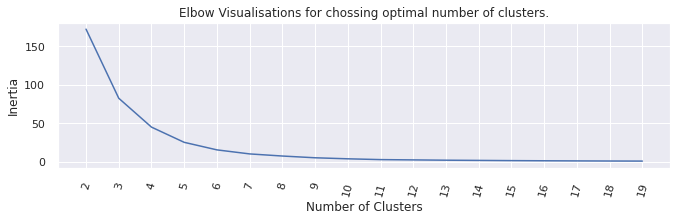

In [ ]:
plot_cluster(data_new)

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6,covariance_type='spherical',random_state=11).fit(data_new)
labels = gmm.predict(data_new)

In [ ]:
data_new['cluster'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_new['cluster'].describe()

count    399.000000
mean       1.165414
std        1.432819
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max        5.000000
Name: cluster, dtype: float64

In [ ]:
data_new.head()

,Price,RentalIncome,cluster
0,655000,-14854.893333,0
1,920000,-22276.080000,0
2,1420000,-36271.613333,2
3,1379000,-34717.280000,2
4,900000,-21187.106667,0


In [ ]:
score = metrics.silhouette_score(data_new[['Price','RentalIncome']], labels, random_state=10)

print("silhouette score: " + str(score.round(2)))

silhouette score: 0.64


In [ ]:
time_elasped = np.random.randint(50, 500, size=data_new.shape[0])
final_house_data['time_elasped']= time_elasped *1

Change= np.random.randint(5,8, size=data_new.shape[0])
final_house_data['Change %']= Change * 1

increase_in_neighbourhood= np.random.randint(2,9, size=data_new.shape[0])
final_house_data['increase_in_neighbourhood']= increase_in_neighbourhood * 1

final_house_data['time_elasped_after2years']=final_house_data['time_elasped']+1000

feature_columns=[ 'Price','increase_in_neighbourhood','Change %','time_elasped']

## Modelling

## KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

import pandas as pd
D=final_house_data[feature_columns]
e=final_house_data['Price']
from sklearn.model_selection import train_test_split
D_train, D_test, e_train, e_test =  train_test_split(D,e,test_size = 0.2) 

# Model
ridge = Ridge(alpha = 1025) 
ridge = ridge.fit(D_train,e_train)
pred=ridge.predict(D_test)
mse = np.mean((pred - e_test)**2)
ridge.score(D_test,e_test)

1.0

In [ ]:
# KNN model:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)


neigh = neigh.fit(D_train,e_train)
pred=neigh.predict(D_test)
mse = np.mean((pred - e_test)**2)
neigh.score(D_test,e_test)

0.8914429310808347

In [ ]:
#Prediction after 2 Years
feature_columns=[ 'Price','increase_in_neighbourhood','Change %','time_elasped_after2years']
X_new=final_house_data[feature_columns]
# ss = StandardScaler()
# X_transform_new = ss.fit_transform(X_new)
future_predicted_values=ridge.predict(X_new)
future_predicted_values

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- time_elasped_after2years
Feature names seen at fit time, yet now missing:
- time_elasped

  warnings.warn(message, FutureWarning)


array([6.550000e+05, 9.200000e+05, 1.420000e+06, 1.379000e+06,
       9.000000e+05, 5.520000e+05, 1.150000e+06, 2.030000e+06,
       6.750000e+05, 1.114000e+06, 1.180000e+06, 1.100000e+06,
       1.060000e+06, 2.100000e+06, 1.726000e+06, 2.068000e+06,
       6.250000e+05, 7.350000e+05, 2.230000e+06, 2.225000e+06,
       2.367000e+06, 1.100000e+06, 1.000000e+06, 6.150000e+05,
       1.870000e+06, 2.375000e+06, 7.150000e+05, 9.200000e+05,
       7.900000e+05, 1.222000e+06, 1.858000e+06, 1.100000e+06,
       9.120000e+05, 8.000000e+05, 6.220000e+05, 1.715000e+06,
       8.950000e+05, 1.920000e+06, 4.500000e+05, 1.595000e+06,
       1.800000e+06, 2.630000e+06, 1.310000e+06, 1.245000e+06,
       1.190000e+06, 7.300000e+05, 7.550000e+05, 1.050297e+06,
       1.130000e+06, 8.500000e+05, 1.035000e+06, 1.395000e+06,
       7.100000e+05, 5.750000e+05, 1.350000e+06, 8.850000e+05,
       1.600000e+06, 1.070000e+06, 6.200000e+05, 1.800000e+06,
       1.650000e+06, 3.430000e+06, 3.425000e+06, 9.3000

In [ ]:
# get profit values based on the future values 
final_house_data['Listprice_2_years']=future_predicted_values
final_house_data['profit_value']=(final_house_data['Listprice_2_years']-final_house_data['Price'])/final_house_data['Price']

In [ ]:
final_house_data['investment_label']=0
final_house_data.loc[final_house_data['profit_value']>0,'investment_label'] = 1

In [ ]:
final_house_data['investment_label'].value_counts()

0    283
1    116
Name: investment_label, dtype: int64

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
!pip install xgboost
from xgboost import XGBClassifier
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

In [ ]:
import pickle
def pickleAndLoad(model,fileName):
  pickle.dump(model, open(fileName, 'wb'))
  loaded_model = pickle.load(open(fileName, 'rb'))
  return loaded_model;

## AdaBoostClassifier - Final Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

feature_cols=['Price','RentalIncome','Change %','time_elasped_after2years','increase_in_neighbourhood', 'Property_Crime','Violent_crime','commute_time']

X = final_house_data[feature_cols]
y = final_house_data['investment_label']


M_train, M_test, n_train, n_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
clf =    AdaBoostClassifier()

# Train Decision Tree Classifer
clf = clf.fit(M_train,n_train)

#Predict the response for test dataset
y_pred = clf.predict(M_test)
file = open('AdaBoostModel', 'wb')
pickle.dump(clf, file)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn import metrics
#accuracy
print("accuracy:", metrics.accuracy_score(n_test,y_pred))
#precision score
print("precision:", metrics.precision_score(n_test,y_pred))
#recall score
print("recall" , metrics.recall_score(n_test,y_pred))
print(metrics.classification_report(n_test, y_pred))

accuracy: 0.9833333333333333
precision: 0.975609756097561
recall 0.975609756097561
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.98      0.98      0.98        41

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
# y_test=n_test
# pred=y_pred
# X_train=M_train
# y_train=n_train
# X_test=M_test

## Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


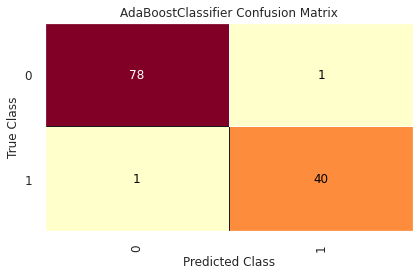

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots()
cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
# cm.fit(X_train, y_train)
cm.fit(M_train, n_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
# cm.score(X_test, y_test)
cm.score(M_test, n_test)

#How did we do?
cm.poof()